In [1]:
import json
import re
import sys

In [2]:
from konlpy.tag import Twitter
from collections import Counter

In [3]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager,rc

In [4]:
import pytagcloud

In [5]:
def showGraph(dust):
    font_location="C:\Windows\Fonts\HYKANB.ttf"
    font_name=font=font_manager.FontProperties(fname=font_location).get_name()
    matplotlib.rc('font',family=font_name)
    plt.xlabel('주요단어')
    plt.ylabel('빈도수')
    plt.grid(True)

    Sorted_Dict_Values=sorted(dust.values(),reverse=True)
    Sorted_Dict_Keys=sorted(dust, key=dust.get, reverse=True)
    plt.bar(range(len(dust)),Sorted_Dict_Values,align='center')
    plt.xticks(range(len(dust)),list(Sorted_Dict_Keys),rotation='70') 
    plt.show()

In [6]:
def saveWorldCloud(wordInfo, filename): 
    taglist=pytagcloud.make_tags(dict(wordInfo).items(),maxsize=60)
    pytagcloud.create_tag_image(taglist,filename,size=(1024,768),fontname='kor',rectangular=False)

In [7]:
def get_tags(text, ntags=50):
    spliter = Twitter()
    # konlpy의 Twitter객체
    nouns = spliter.nouns(text)
    # nouns 함수를 통해서 text에서 명사만 분리/추출
    count = Counter(nouns)
    # Counter객체를 생성하고 참조변수 nouns할당
    return_list = []  # 명사 빈도수 저장할 변수
    for n, c in count.most_common(ntags):
        temp = {'tag': n, 'count': c}
        return_list.append(temp)
    # most_common 메소드는 정수를 입력받아 객체 안의 명사중 빈도수
    # 큰 명사부터 순서대로 입력받은 정수 갯수만큼 저장되어있는 객체 반환
    # 명사와 사용된 갯수를 return_list에 저장합니다.
    return return_list 

In [8]:
def main():
    openFileName='통일(과제).json'
    output_file_Name = '통일(word파일).json'
    cloudImageFile='wordcloudunity.jpg'
    rfile=open(openFileName, 'r', encoding='utf-8').read()
    open_output_file= open(output_file_Name, 'w', encoding='utf-8')
    jsonData=json.loads(rfile)
    message=""
    for item in jsonData:
        if 'description' in item.keys():
            message=message+re.sub(r'[^\w]', '', item['description'])+'' 
            
    nlp=Twitter()
    nouns=nlp.nouns(message)
    count=Counter(nouns)
    
    wordInfo=dict()
    for tags, counts in count.most_common(50):
        if (len(str(tags))>1):
            wordInfo[tags]=counts
            print("%s : %d" % (tags, counts))

    open_output_file.write('{} {}\n'.format(nouns, count)) 
    saveWorldCloud(wordInfo,cloudImageFile)


In [9]:
if __name__=="__main__":
    main()

통일 : 1690
평화 : 477
남북 : 366
판문점 : 306
북한 : 295
장관 : 265
회담 : 257
고위 : 195
조명 : 179
대표 : 173
서울 : 166
위원회 : 159
조국 : 146
선언 : 143
정부 : 138
협의 : 138
기자 : 136
한반도 : 121
경제 : 108
개최 : 108
이행 : 103
사진 : 99
한국 : 93
행사 : 91
리선 : 90
정책 : 89
지문 : 88
방안 : 86
위원장 : 83
공동 : 79
부장 : 77
뉴스 : 76
민주 : 75
수석 : 73
통해 : 72


In [10]:
import pandas as pd
from pandas import Series, DataFrame    

In [11]:
 unity_Korea = pd.DataFrame([{'주요단어' : '통일', '빈도수' : '1420'},
                         {'주요단어' : '북한', '빈도수' : '428'},
                         {'주요단어' : '남북', '빈도수' : '348'},
                         {'주요단어' : '평화', '빈도수' : '252'},
                         {'주요단어' : '한반도', '빈도수' : '170'},
                         {'주요단어' : '하나', '빈도수' : '164'},
                         {'주요단어' : '남북정상회담', '빈도수' : '138'},
                         {'주요단어' : '시간', '빈도수' : '113'},
                         {'주요단어' : '대통령', '빈도수' : '109'},
                         {'주요단어' : '한국', '빈도수' : '107'},
                         {'주요단어' : '김정은', '빈도수' : '105'},
                         {'주요단어' : '장관', '빈도수' : '101'},
                         {'주요단어' : '경제', '빈도수' : '92'},
                         {'주요단어' : '사항', '빈도수' : '85'},
                         {'주요단어' : '개최', '빈도수' : '85'},
                         {'주요단어' : '정상회담', '빈도수' : '84'},
                         {'주요단어' : '서울', '빈도수' : '84'},
                         {'주요단어' : '북미', '빈도수' : '83'},
                         {'주요단어' : '정부', '빈도수' : '81'},
                         {'주요단어' : '종업원', '빈도수' : '79'},
                         {'주요단어' : '위원', '빈도수' : '75'},
                         {'주요단어' : '탈북', '빈도수' : '73'},
                         {'주요단어' : '협의', '빈도수' : '69'},
                         {'주요단어' : '연구원', '빈도수' : '68'},
                         {'주요단어' : '판문점', '빈도수' : '68'},
                         {'주요단어' : '교류', '빈도수' : '66'},
                         {'주요단어' : '선언', '빈도수' : '65'},
                         {'주요단어' : '높이', '빈도수' : '64'},
                         {'주요단어' : '행사', '빈도수' : '63'},
                         {'주요단어' : '이번', '빈도수' : '62'},
                         {'주요단어' : '기자', '빈도수' : '61'},
                         {'주요단어' : '시대', '빈도수' : '60'},
                         {'주요단어' : '정례', '빈도수' : '59'},
                         {'주요단어' : '국정원', '빈도수' : '59'},
                         {'주요단어' : '때제', '빈도수' : '59'},
                         {'주요단어' : '회담', '빈도수' : '58'},
                         {'주요단어' : '우리', '빈도수' : '57'},    
                         {'주요단어' : '지역', '빈도수' : '56'},
                         {'주요단어' : '금융', '빈도수' : '55'},
                         {'주요단어' : '최근', '빈도수' : '55'},
                         {'주요단어' : '부대', '빈도수' : '54'},
                         {'주요단어' : '국무위원', '빈도수' : '53'},
                         {'주요단어' : '성공', '빈도수' : '53'},
                         {'주요단어' : '번영', '빈도수' : '53'},
                         {'주요단어' : '브리핑', '빈도수' : '53'},
                         {'주요단어' : '이후', '빈도수' : '53'},
                         {'주요단어' : '민병', '빈도수' : '49'},
                         {'주요단어' : '위원장', '빈도수' : '48'},
                         {'주요단어' : '회의', '빈도수' : '47'},
                         {'주요단어' : '협력', '빈도수' : '47'}])

In [24]:
unity_Korea.to_csv("통일.csv",encoding="cp949",mode="w",index=True)

In [12]:
unity_Korea

빈도수    주요단어
0   1420      통일
1    428      북한
2    348      남북
3    252      평화
4    170     한반도
5    164      하나
6    138  남북정상회담
7    113      시간
8    109     대통령
9    107      한국
10   105     김정은
11   101      장관
12    92      경제
13    85      사항
14    85      개최
15    84    정상회담
16    84      서울
17    83      북미
18    81      정부
19    79     종업원
20    75      위원
21    73      탈북
22    69      협의
23    68     연구원
24    68     판문점
25    66      교류
26    65      선언
27    64      높이
28    63      행사
29    62      이번
30    61      기자
31    60      시대
32    59      정례
33    59     국정원
34    59      때제
35    58      회담
36    57      우리
37    56      지역
38    55      금융
39    55      최근
40    54      부대
41    53    국무위원
42    53      성공
43    53      번영
44    53     브리핑
45    53      이후
46    49      민병
47    48     위원장
48    47      회의
49    47      협력

In [13]:
font_location="C:\Windows\Fonts\H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (50,10) 

In [14]:
x=unity_Korea['주요단어']

In [15]:
y=unity_Korea['빈도수']

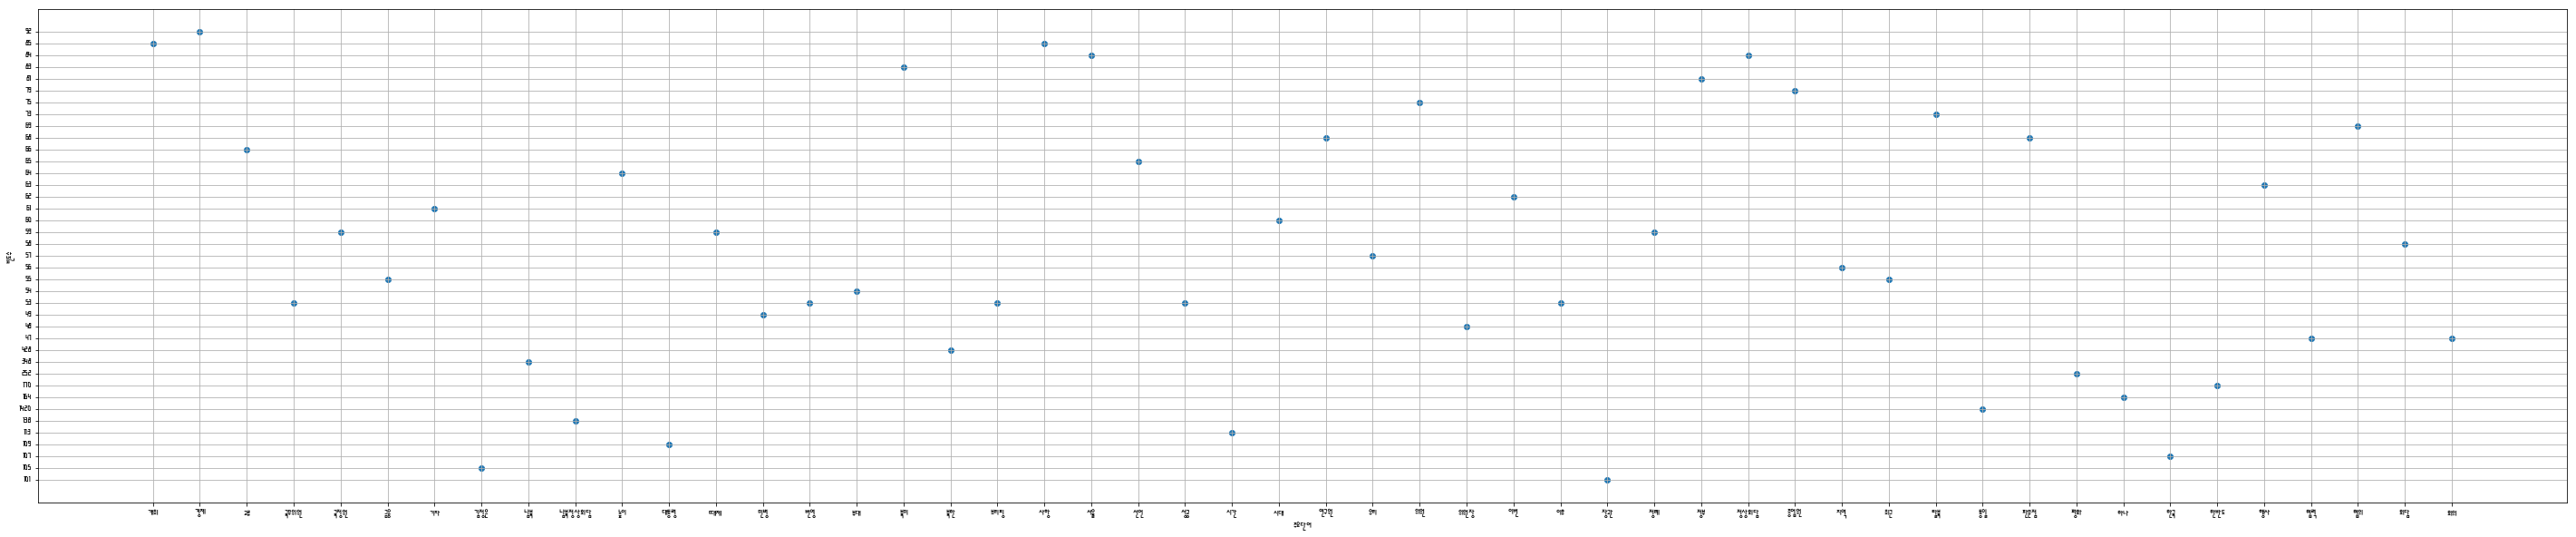

In [16]:
plt.xlabel('주요단어')
plt.ylabel('빈도수')
plt.grid(True)

plt.scatter(x,y)

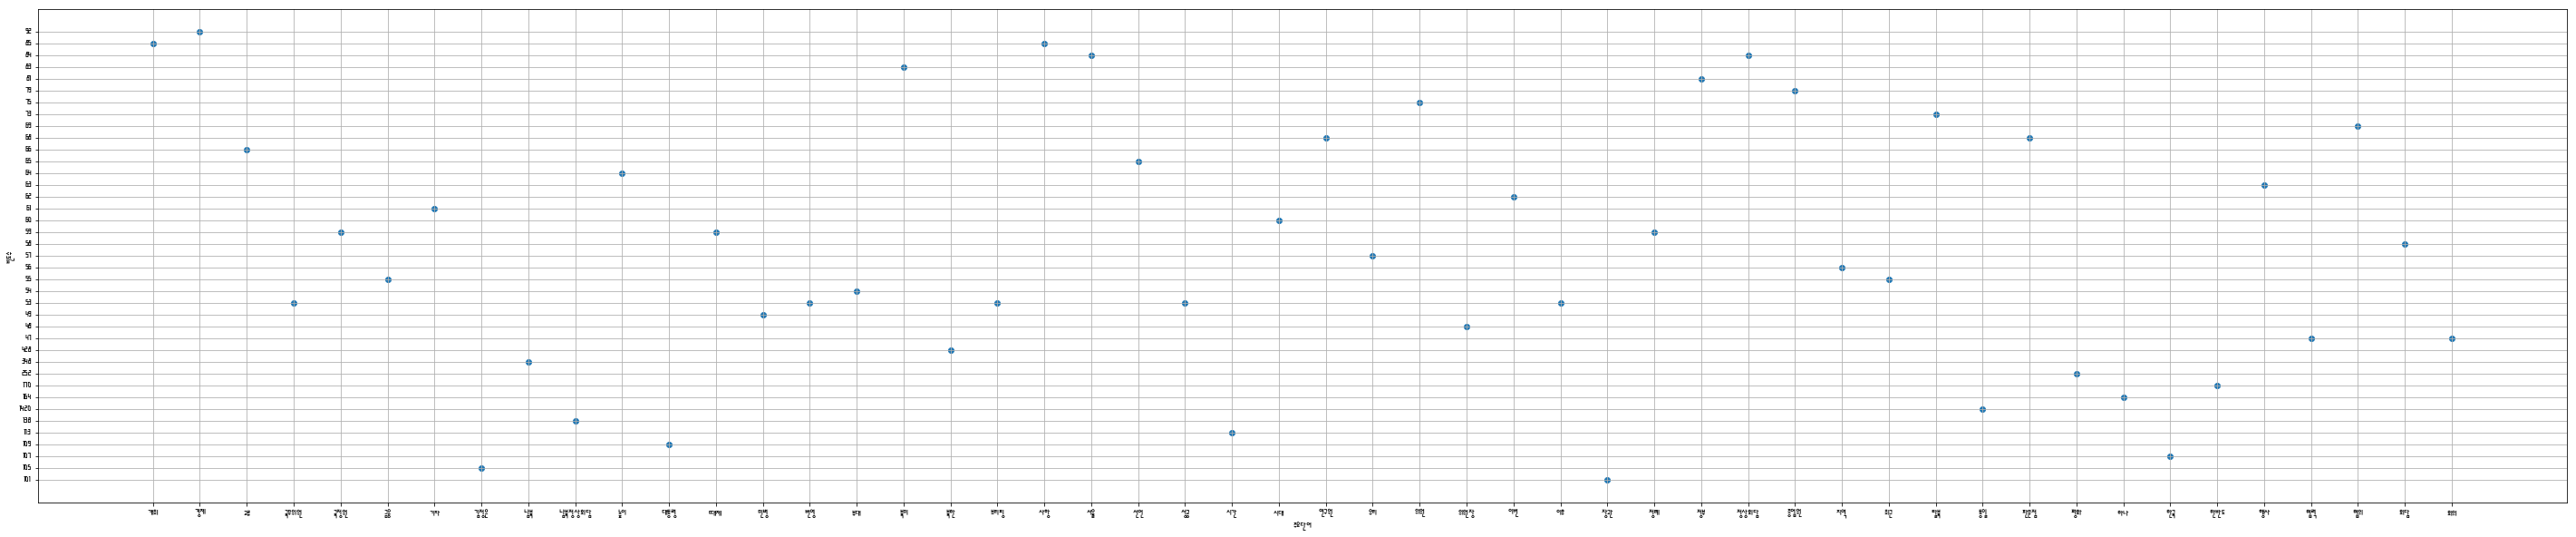

In [17]:
font_location="C:\Windows\Fonts\H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (50,10) 

x=unity_Korea['주요단어']
y=unity_Korea['빈도수']

plt.xlabel('주요단어')
plt.ylabel('빈도수')
plt.grid(True)
plt.scatter(x,y)

In [18]:
unity_Korea_D = pd.Series(unity_Korea.빈도수, dtype ='i')
unity_Korea_N = pd.Series(unity_Korea.주요단어)

Text(0,0.5,'통일')

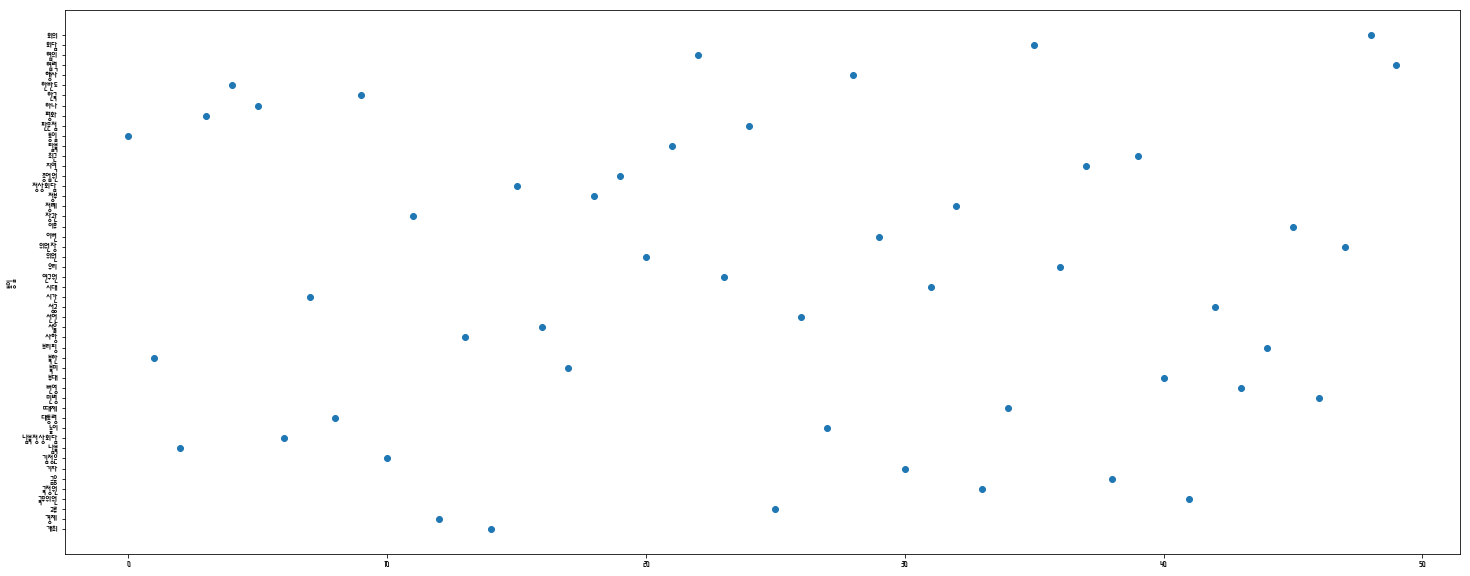

In [19]:
font_location="C:\Windows\Fonts\H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (25,10)
plt.scatter(unity_Korea.index, unity_Korea_N)
plt.ylabel('통일')

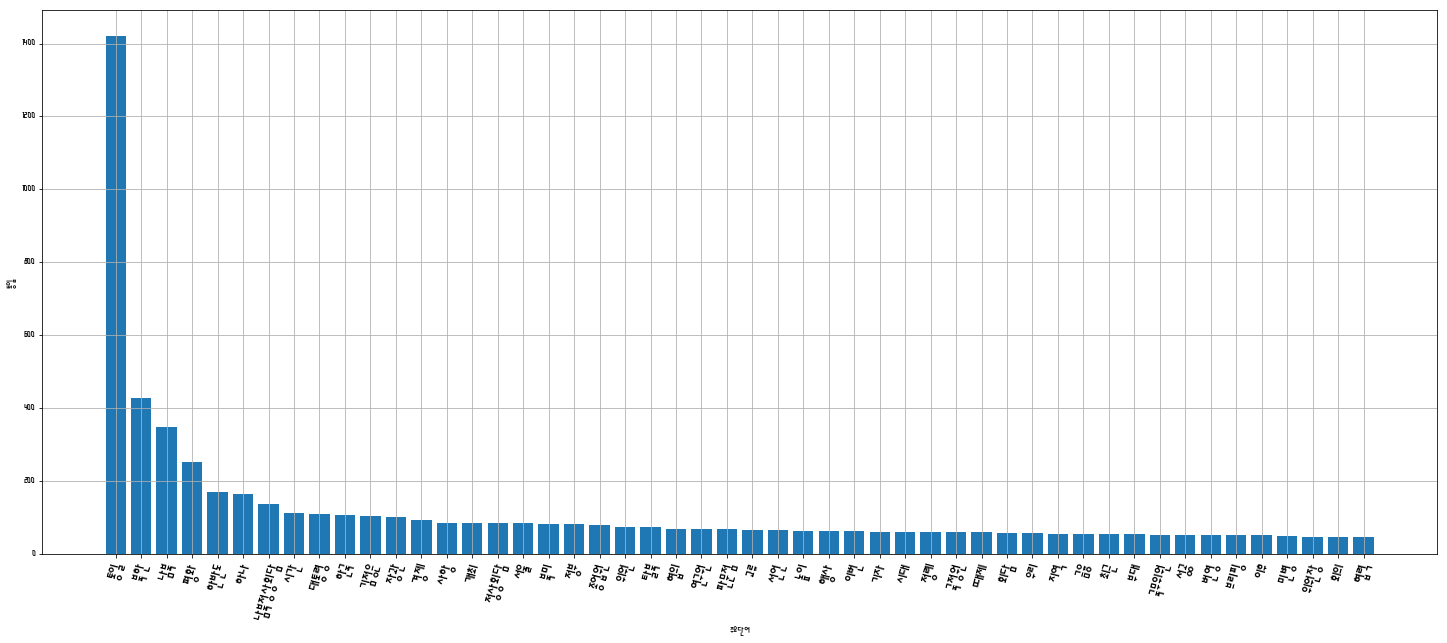

In [20]:
font_location="C:\Windows\Fonts\H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.xlabel('주요단어')
plt.ylabel('빈도수')
plt.grid(True)
    
plt.rcParams["figure.figsize"] = (25,10)
plt.bar(unity_Korea.index, unity_Korea_D)#,) 
plt.xticks(unity_Korea.index, unity_Korea_N, rotation='75')
plt.ylabel('통일') 
matplotlib.pyplot.xticks(fontsize=16)
plt.show()

In [21]:
sort_unity_Korea=unity_Korea.sort_values(['주요단어'], ascending=False)

In [22]:
sort_unity_Korea

빈도수    주요단어
48    47      회의
35    58      회담
22    69      협의
49    47      협력
28    63      행사
4    170     한반도
9    107      한국
5    164      하나
3    252      평화
24    68     판문점
0   1420      통일
21    73      탈북
39    55      최근
37    56      지역
19    79     종업원
15    84    정상회담
18    81      정부
32    59      정례
11   101      장관
45    53      이후
29    62      이번
47    48     위원장
20    75      위원
36    57      우리
23    68     연구원
31    60      시대
7    113      시간
42    53      성공
26    65      선언
16    84      서울
13    85      사항
44    53     브리핑
1    428      북한
17    83      북미
40    54      부대
43    53      번영
46    49      민병
34    59      때제
8    109     대통령
27    64      높이
6    138  남북정상회담
2    348      남북
10   105     김정은
30    61      기자
38    55      금융
33    59     국정원
41    53    국무위원
25    66      교류
12    92      경제
14    85      개최

In [23]:
font_location="C:\Windows\Fonts\H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.xlabel('주요단어')
plt.ylabel('빈도수')
plt.grid(True)
    
plt.rcParams["figure.figsize"] = (25,10)
plt.bar(sort_unity_Korea.index, unity_Korea_D)#,) 'cH:', lw=5, ms=10) #x축과 y축 그래프의 형태를 호출한다.(해당 index값만큼과 pm25값만큼 산출해준다. )
plt.xticks(sort_unity_Korea.index, unity_Korea_N, rotation='75')
plt.ylabel('통일') #라벨을 지정해준다.
matplotlib.pyplot.xticks(fontsize=16)
plt.show()